# Reading of ozone data in Kollumerwaard

In [1]:
import pyaerocom as pya


Initating pyaerocom configuration
Checking server configuration ...
Checking access to: /lustre/storeA
Access to lustre database: True
Init data paths for lustre
Expired time: 0.030 s


In [2]:
reader = pya.io.ReadEbas()
print(reader.PROVIDES_VARIABLES)

['DEFAULT', 'scatc550aer', 'scatc550dryaer', 'scatc550lt1aer', 'bscatc550aer', 'absc550aer', 'absc550dryaer', 'absc550lt1aer', 'bscatc550dryaer', 'scatcrh', 'abscrh', 'sconcso4', 'sconcso2', 'sconcpm10', 'sconcpm25', 'sconcso4t', 'sconcso4c', 'sconcbc', 'sconcss', 'sconcnh3', 'sconcno3', 'sconcnh4', 'sconchno3', 'sconctno3', 'sconcno2', 'sconceqbc', 'sconcoa', 'sconco3', 'sconcco', 'concprcpso4', 'concprcpso4t', 'concprcpso4c', 'concprcpno3', 'concprcpso4scavenging', 'concprcpnh4', 'wetso4', 'wetconcso4', 'wetso4t', 'wetso4c', 'wetoxn', 'wetrdn', 'wetnh4', 'precip', 'wetconcph', 'wetno3', 'scavratioso4', 'test']


## Read all files

In [3]:
data_all = reader.read('sconco3', station_names='Kollumerwaard', datalevel=None)

Reading file 1 of 28 (ReadEbas)
Reading file 3 of 28 (ReadEbas)
Reading file 5 of 28 (ReadEbas)
Reading file 7 of 28 (ReadEbas)
Reading file 9 of 28 (ReadEbas)
Reading file 11 of 28 (ReadEbas)
Reading file 13 of 28 (ReadEbas)
Reading file 15 of 28 (ReadEbas)
Reading file 17 of 28 (ReadEbas)
Reading file 19 of 28 (ReadEbas)
Reading file 21 of 28 (ReadEbas)
Reading file 23 of 28 (ReadEbas)
Reading file 25 of 28 (ReadEbas)
Reading file 27 of 28 (ReadEbas)


In [4]:
data_lev2 = reader.read('sconco3', station_names='Kollumerwaard', datalevel=2)

Reading file 1 of 3 (ReadEbas)
Reading file 2 of 3 (ReadEbas)
Reading file 3 of 3 (ReadEbas)


In [5]:
stat_all = data_all.to_station_data('Koll*', 'sconco3', freq='daily')
stat_lev2 = data_lev2.to_station_data('Koll*', 'sconco3', freq='daily')

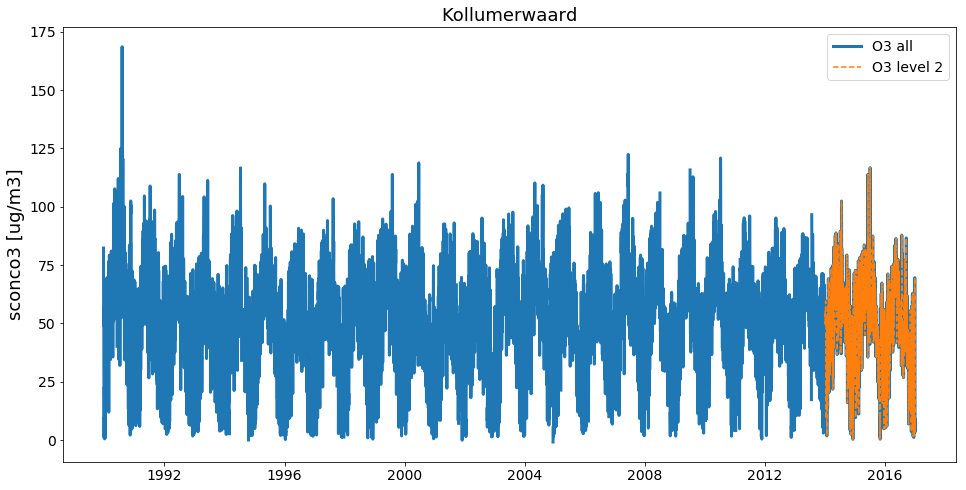

In [6]:
ax = stat_all.plot_timeseries('sconco3', lw=3, add_overlaps=True, label='O3 all')
stat_lev2.plot_timeseries('sconco3', ls='--', add_overlaps=True,ax=ax, label='O3 level 2')

In [7]:
data_lev2_filter = data_lev2.filter_by_meta(datalevel=2)
data_lev2_filter.remove_outliers('sconco3', high=90, inplace=True, move_to_trash=False)

Setting sconco3 outlier lower lim: -8999999999999999897486646837248.00


UngriddedData <networks: ['EBASMC']; vars: ['sconco3']; instruments: ['TE49w_nl0009', 'TE49W_nl0009'];No. of stations: 3

In [8]:
stat_lev2_filter = data_lev2_filter.to_station_data('Koll*', 'sconco3', freq='daily')

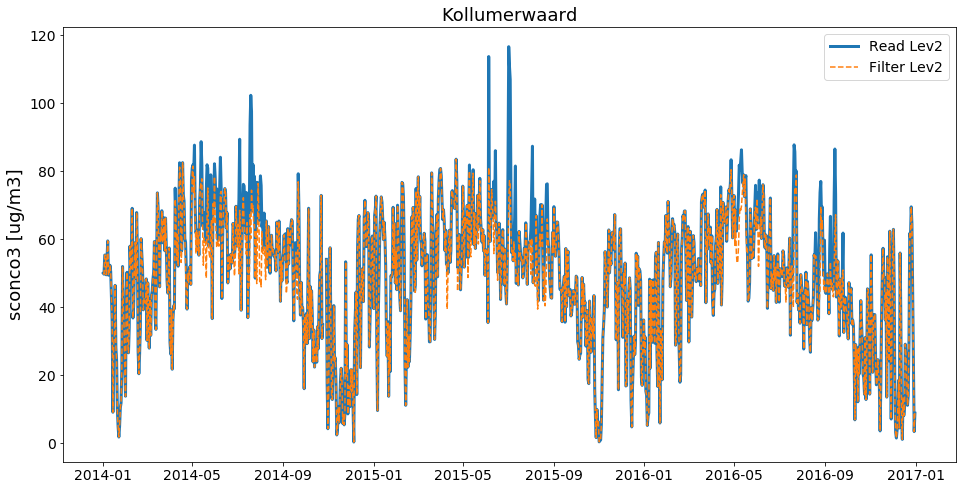

In [9]:
ax = stat_lev2.plot_timeseries('sconco3', lw=3, label='Read Lev2')
ax = stat_lev2_filter.plot_timeseries('sconco3', ls='--', label='Filter Lev2', ax=ax)

In [10]:
data_all.data_revision

OrderedDict([('EBASMC', '20190115')])